In [2]:
import matplotlib.pyplot as plt
from scipy.stats import probplot, ks_2samp
from sklearn.neighbors import KernelDensity
from sklearn.metrics import mean_squared_error
from scipy.stats import entropy
import numpy as np
import pandas as pd

In [ ]:
# Load the data files
kinetic_data = pd.read_csv("Continuous_Pathway_I_VAE_dataset1.csv").drop('Unnamed: 0', axis=1)
kinetic_samples = kinetic_data.values
generated_data = pd.read_csv("data_ld5_beta0.75_lr1e-4_wd1e-3_ne1000_batch_100_testing.csv").drop('Unnamed: 0', axis=1)
# generated_data = pd.read_csv("data_ppca2.csv").drop('Unnamed: 0', axis=1)
generated_samples = generated_data.values

# Define bandwidth for kernel density estimation
bandwidth = 0.7

# Fit KDE to the first dataset
kde1 = KernelDensity(bandwidth=bandwidth).fit(kinetic_samples)

# Evaluate the KDE on a grid of points
x_grid = np.linspace(min(np.min(kinetic_samples), np.min(generated_samples)), max(np.max(kinetic_samples), np.max(generated_samples)), 1000)  # Adjust the range based on your data
log_density1 = kde1.score_samples(x_grid.reshape(-1, 20))

# Fit KDE to the second dataset
kde2 = KernelDensity(bandwidth=bandwidth).fit(generated_samples)

# Evaluate the KDE on the same grid of points
log_density2 = kde2.score_samples(x_grid.reshape(-1, 20))

# Calculate the relative entropy D = sum(pk * log(pk / qk)).
# This quantity is also known as the Kullback-Leibler divergence.
kl_divergence = entropy(np.exp(log_density1), qk=np.exp(log_density2))

print("KL Divergence:", kl_divergence)

KL Divergence: 0.010644765491838466


In [ ]:
# Randomly pick 1000 items from the datasets and convert them to numpy arrays
gen_data = generated_data.sample(n=1000, random_state=25).values
kin_data = kinetic_data.sample(n=1000, random_state=25).values

# Perform the KS test for each variable
ks_statistics = []
p_values = []

for i in range(kin_data.shape[1]):
    ks_statistic, p_value = ks_2samp(kin_data[:, i], gen_data[:, i])
    ks_statistics.append(ks_statistic)
    p_values.append(p_value)

# Print results
print("Feature \ KS Statistic")
for i in range(kin_data.shape[1]):
    print(f"{i + 1} & {ks_statistics[i]:.3f}")

Feature \ KS Statistic
1 & 0.062
2 & 0.130
3 & 0.104
4 & 0.075
5 & 0.068
6 & 0.090
7 & 0.087
8 & 0.127
9 & 0.090
10 & 0.074
11 & 0.091
12 & 0.246
13 & 0.095
14 & 0.089
15 & 0.102
16 & 0.087
17 & 0.158
18 & 0.068
19 & 0.168
20 & 0.103


In [37]:
# Load the datasets, first couple is for beta-CVAE, second for PPCA
true_labels = pd.read_csv("beta0.75_ne1000_batch100_true_labels.csv").drop('Unnamed: 0', axis=1).values
gen_labels = pd.read_csv("beta0.75_ne1000_batch100.csv").drop('Unnamed: 0', axis=1).values
# PPCA needs samples to be dropped as there are blank values
# true_labels = pd.read_csv("ppca_best_true_labels.csv").drop('Unnamed: 0', axis=1).dropna(subset=["Enz_I"]).values
# gen_labels = pd.read_csv("ppca_best.csv").drop('Unnamed: 0', axis=1).sample(n=744, random_state=25).values
# Mean Squared Error (MSE)
mse_value = mean_squared_error(true_labels[:, 19], gen_labels[:, 19])
print("Mean Squared Error (MSE):", mse_value)

Mean Squared Error (MSE): 0.42977796243682287
KL Divergence: 0.0004878260867344055
KS Statistic: 0.099


In [ ]:
# Save the dataset for testing on the kinetic model
generated1000 = generated_data.sample(n=1000, random_state=25)
generated1000.to_csv("ppca_best.csv")

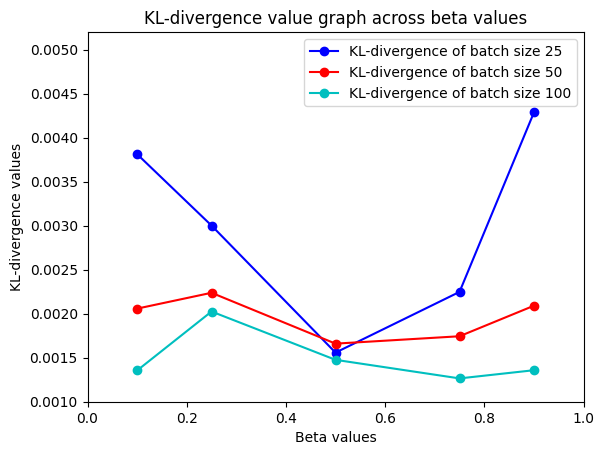

In [20]:
# Load the beta and KL-divergence values
x = [0.1, 0.25, 0.5, 0.75, 0.9]
y1 = [0.003813, 0.003002, 0.001558, 0.002248, 0.004287]
y2 = [0.002058, 0.002238, 0.001660, 0.001744, 0.002091]
y3 = [0.001355, 0.002025, 0.001476, 0.001265, 0.001358]

# Create an array of colors for each data series
colors = ['b', 'r', 'c',]

# Plot each set of data with both lines and points using a loop
for i, data in enumerate([y1, y2, y3]):
    plt.plot(x, data, label=f'Data {i+1}', marker='o', color=colors[i])

# Customize the plot
plt.axis([0.0, 1.0, 0.001, 0.0052])
plt.xlabel('Beta values')
plt.ylabel('KL-divergence values')
plt.title('KL-divergence value graph across beta values')
plt.legend(['KL-divergence of batch size 25', 'KL-divergence of batch size 50', 'KL-divergence of batch size 100'], fontsize="10", loc ="upper right")  # Show legend with labels

# Show the plot
plt.show()